# Data Science- K-Nearest Neighbors

### In this advanced data science topic, we will be exploring how the K-Nearest Neighbors (KNN) algorithm works. It will utilize concepts taught in module 3 such as pandas and dataframes. For this project we will be using a dataset from Kaggle on predicting heart attacks

### Link to dataset: https://www.kaggle.com/code/nareshbhat/heart-attack-prediction-using-different-ml-models/notebook

## Import Stuff

In [ ]:
# Install and import all the neccessary stuff

%pip install scikit-learn
%pip install pandas


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Load data

### First thing we will do is load the data into pandas and look at its structure. Let's take a look at the first few rows using ```df.head()``` to get a look at what we have.

### We also want to run ```df.info``` to get some metadata to save us some time from counting rows and columns by hand.

### Attribute Information
1) age
2) sex
3) cp = chest pain type (4 values)
4) trestbps = resting blood pressure
5) chol = serum cholestoral in mg/dl
6) fbs = fasting blood sugar > 120 mg/dl
7) restecg = resting electrocardiographic results (values 0,1,2)
8) thalach = maximum heart rate achieved
9) exang = exercise induced angina 
10) oldpeak = ST depression induced by exercise relative to rest
11) slope = the slope of the peak exercise ST segment
12) ca = number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack

In [4]:
# Import the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Let's explore the data a little more by visualizing it 

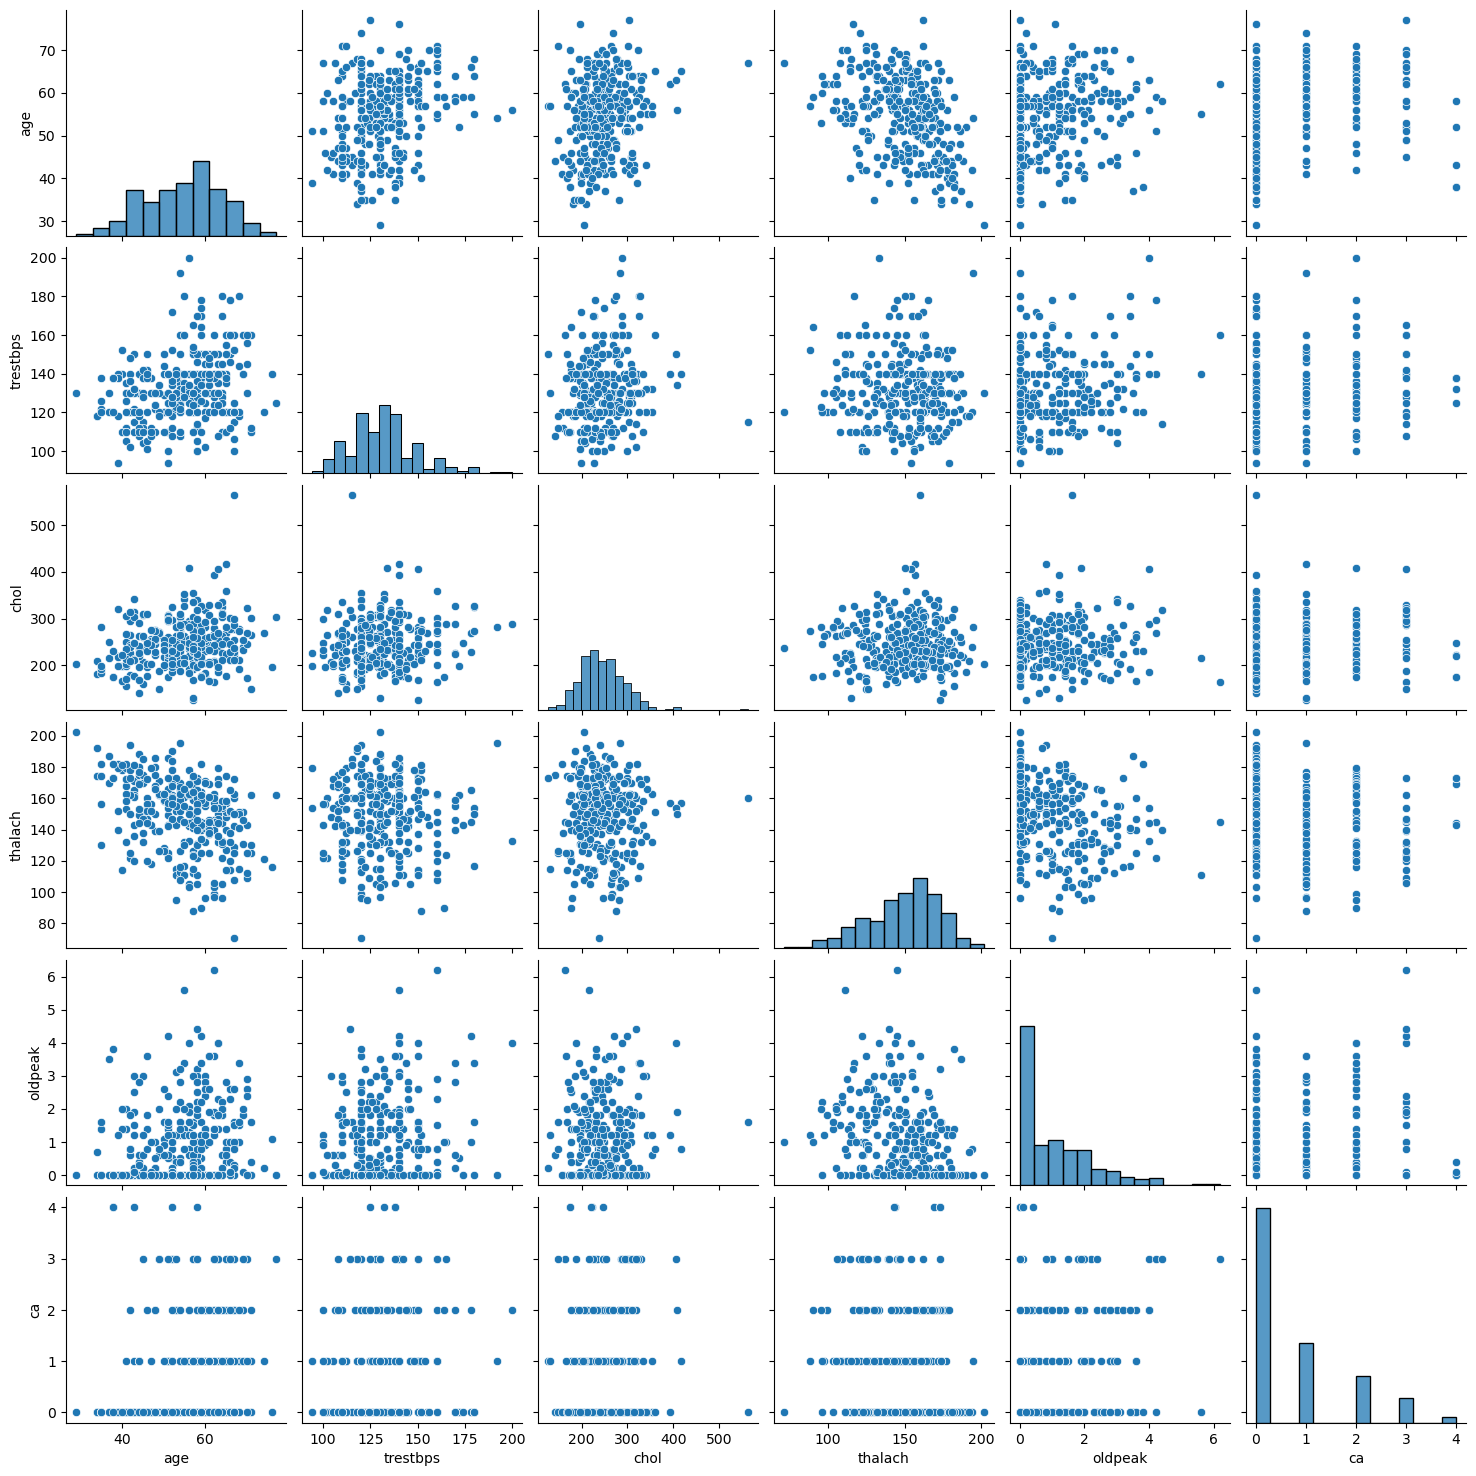

In [11]:
# Create a subset of the dataframe. 
# We do this by passing a list of these column names to the dataframe df. 
subset = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']]

# Now we're going to create a "pair plot" of this subset. Pair plots are a great way to visualize relationships 
# between different pairings of these variables. In a pair plot, the diagonal elements show the histogram of the 
# data for that particular variable, and the off-diagonal elements show scatter plots of one variable versus another
sns.pairplot(subset)

# lets take a look!
plt.show()

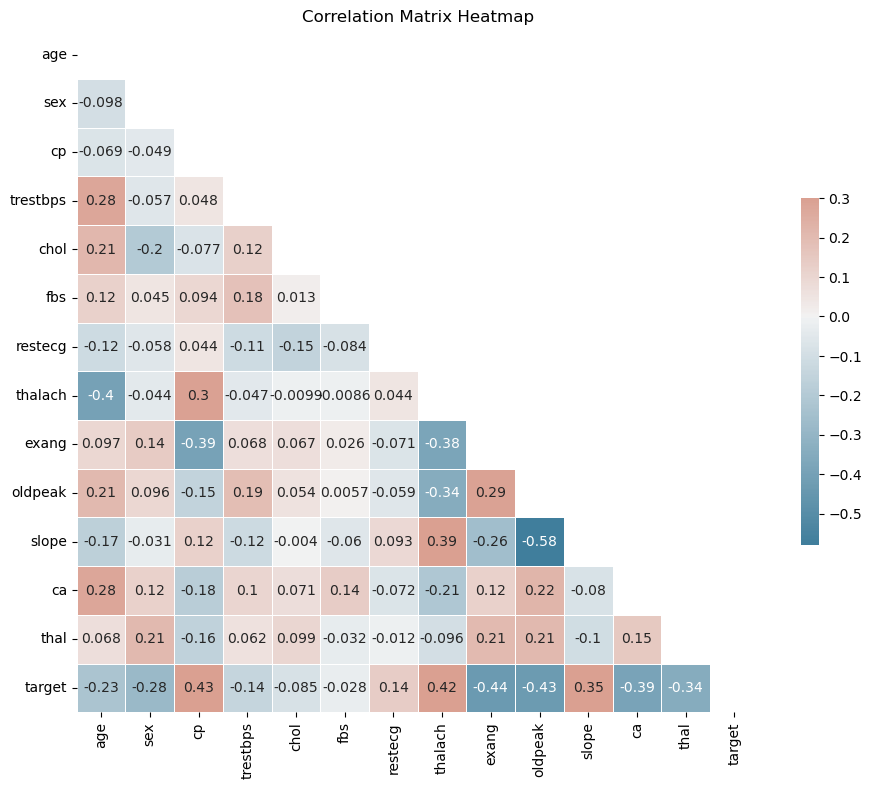

In [8]:
import seaborn as sns

corr = df.corr() # This line computes the correlation matrix of the DataFrame.
                 #  It calculates the Pearson correlation coefficient for each pair of numerical columns. 
                 # Post cleaning, all of our columns have some kind of numerical representation.

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) #  Here, create a mask for the upper triangle of your correlation matrix. 
                                               # This is done because the matrix is symmetric, i.e., the lower triangle is a mirror 
                                               # image of the upper triangle. Thus, showing both would be redundant.
                                               # You don't technially need to do this, but its a nice trick...

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
# Look at the sns documenttion for details on all of the arguments. 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

## Splitting the Data

### For machine learning, we need to split our data into train and test subsets. We do this in order to first teach our model trends to look for using the train dataset. Then, we use the test data to verify our model learned the correct trends. 

### The first thing we have to do is take the labels we count as "truth" which in our case is our target column. All of the other columns will be our "features". These features are what the machine learning model takes and tries to learn from. 

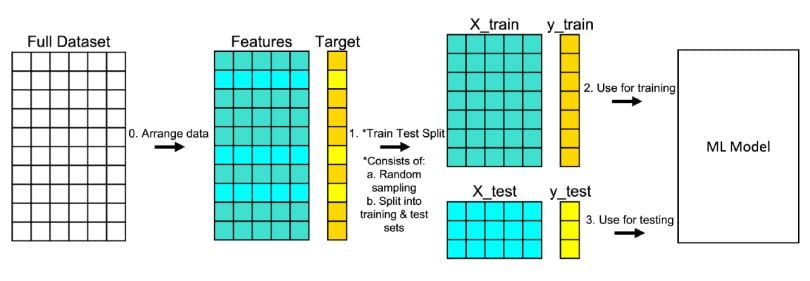
